In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('midfielders_rating_X.csv')
y = pd.read_csv('midfielders_rating_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             0.0              1.0           0.0   
1    0.0      0.0             0.0              0.0           0.0   
2    0.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    0.0      1.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses   touches  ...  \
0            0.0           0.0             0.0        0.0  0.000000  ...   
1            0.0           1.0             0.0        0.0  0.000000  ...   
2            0.0           1.0             0.0        0.0  0.000000  ...   
3            0.0           0.0             0.0        0.0  0.000000  ...   
4            0.0           0.0             0.0        0.0  0.333333  ...   

        day  pos_role_AMC  pos_role_AML  pos_role_AMR  pos_role_DMC  \
0  0.634610      0.608589      0.419034      0.129835      0.00

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X.dtypes

goals                     float64
assists                   float64
shots_ontarget            float64
shots_offtarget           float64
shotsblocked              float64
chances2score             float64
drib_success              float64
drib_unsuccess            float64
keypasses                 float64
touches                   float64
passes_acc                float64
passes_inacc              float64
crosses_acc               float64
crosses_inacc             float64
lballs_acc                float64
lballs_inacc              float64
grduels_w                 float64
grduels_l                 float64
aerials_w                 float64
aerials_l                 float64
poss_lost                 float64
fouls                     float64
wasfouled                 float64
clearances                float64
stop_shots                float64
interceptions             float64
tackles                   float64
dribbled_past             float64
tballs_acc                float64
tballs_inacc  

In [5]:
import pandas as pd

# Assuming X_train_corr is your DataFrame
df = X

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:


In [6]:
X.shape

(7206, 58)

In [7]:
X.columns

Index(['goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked',
       'chances2score', 'drib_success', 'drib_unsuccess', 'keypasses',
       'touches', 'passes_acc', 'passes_inacc', 'crosses_acc', 'crosses_inacc',
       'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l', 'aerials_w',
       'aerials_l', 'poss_lost', 'fouls', 'wasfouled', 'clearances',
       'stop_shots', 'interceptions', 'tackles', 'dribbled_past', 'tballs_acc',
       'tballs_inacc', 'ycards', 'rcards', 'dangmistakes', 'countattack',
       'offsides', 'saves_otb', 'missed_penalties', 'owngoals',
       'degree_centrality', 'betweenness_centrality', 'closeness_centrality',
       'flow_centrality', 'flow_success', 'betweenness2goals', 'minutesPlayed',
       'game_duration', 'year', 'month', 'day', 'pos_role_AMC', 'pos_role_AML',
       'pos_role_AMR', 'pos_role_DMC', 'pos_role_DML', 'pos_role_DMR',
       'pos_role_MC', 'pos_role_ML', 'pos_role_MR'],
      dtype='object')

In football (soccer), player positions are grouped into four main categories: Goalkeepers, Defenders, Midfielders, and Forwards. Each of the columns you mentioned in your dataset corresponds to a specific position within these categories. Here’s a detailed breakdown:

Goalkeepers (GK)
GK (Goalkeeper): The primary role is to prevent the opposing team from scoring by guarding the goal. Goalkeepers are the only players allowed to use their hands, but only within the penalty area.
Defenders
LB (Left Back): A defender positioned on the left side, responsible for preventing opposition attacks down the right wing.
LCB (Left Center Back): A central defender on the left side of the defense.
CB (Center Back): Central defenders who protect the area directly in front of the goal.
RCB (Right Center Back): A central defender on the right side of the defense.
RB (Right Back): A defender positioned on the right side, responsible for preventing opposition attacks down the left wing.
LWB (Left Wing Back): Similar to a left back but with more offensive duties, often seen in formations with three central defenders.
RWB (Right Wing Back): Similar to a right back but with more offensive duties, often seen in formations with three central defenders.
Midfielders
CDM (Center Defensive Midfielder): Positioned in front of the defenders, focusing on intercepting the ball and breaking up opposition plays.
LDM (Left Defensive Midfielder): A defensive midfielder on the left side.
RDM (Right Defensive Midfielder): A defensive midfielder on the right side.
CM (Center Midfielder): Plays centrally, linking defense and attack, often covering both defensive and offensive roles.
LCM (Left Center Midfielder): A central midfielder leaning towards the left.
RCM (Right Center Midfielder): A central midfielder leaning towards the right.
CAM (Center Attacking Midfielder): Positioned behind the forwards, focusing on creating scoring opportunities.
LAM (Left Attacking Midfielder): An attacking midfielder on the left side.
RAM (Right Attacking Midfielder): An attacking midfielder on the right side.
LM (Left Midfielder): Positioned on the left side of the midfield, balancing defense and attack.
RM (Right Midfielder): Positioned on the right side of the midfield, balancing defense and attack.
Forwards
ST (Striker): The primary goal-scorer, positioned closest to the opponent's goal.
LS (Left Striker): A forward on the left side of the attack.
RS (Right Striker): A forward on the right side of the attack.
CF (Center Forward): Similar to a striker but may play slightly deeper, involved in both scoring and assisting.
LF (Left Forward): Positioned on the left side, slightly behind the main striker.
RF (Right Forward): Positioned on the right side, slightly behind the main striker.
LW (Left Winger): Positioned on the left wing, focused on delivering crosses and creating scoring opportunities from wide positions.
RW (Right Winger): Positioned on the right wing, focused on delivering crosses and creating scoring opportunities from wide positions.
These groupings ensure a balanced distribution of responsibilities on the field, with each position playing a crucial role in the team's overall strategy​ (Football Guide)​​ (Jobs In Football)​​ (Soccermodo)​.

https://www.football-guide.com/soccer-info/soccer-positions-explained.html

https://jobsinfootball.com/blog/soccer-positions/

https://soccermodo.com/soccer-positions/






In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature        Score
0                  touches  2574.404155
1             pos_role_DMC  1630.164190
2             passes_inacc  1615.803854
3                aerials_w  1272.990012
4               passes_acc  1150.194524
5            interceptions  1002.816565
6             pos_role_AML   947.165859
7             pos_role_AMR   928.105798
8             pos_role_DML   651.954404
9                    month   647.997227
10               aerials_l   530.998607
11            lballs_inacc   520.545544
12            tballs_inacc   471.860966
13            flow_success   431.865651
14               grduels_l   406.500781
15            pos_role_AMC   402.922979
16              lballs_acc   394.988661
17                owngoals   312.859668
18               poss_lost   286.941893
19                     day   275.106103
20              clearances   247.378274
21               saves_otb   245.216462
22                   fouls   228.761117
23           dribbled_past   197.729377


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Perform feature selection using SelectKBest with mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                   Feature         Score
0                  touches  1.269643e-01
1             pos_role_DMC  1.191870e-01
2                aerials_w  1.003113e-01
3             passes_inacc  9.418834e-02
4            interceptions  7.524704e-02
5               passes_acc  7.398098e-02
6             pos_role_AML  7.381442e-02
7                    month  6.643301e-02
8             pos_role_DML  6.141838e-02
9                aerials_l  6.014412e-02
10            pos_role_AMR  5.634614e-02
11            pos_role_AMC  5.014932e-02
12            tballs_inacc  4.796746e-02
13               grduels_l  3.183318e-02
14           dribbled_past  3.068774e-02
15            lballs_inacc  2.885394e-02
16              lballs_acc  2.823680e-02
17                offsides  2.822790e-02
18                     day  2.785557e-02
19            flow_success  2.546347e-02
20                   fouls  2.498491e-02
21                  rcards  2.417046e-02
22                owngoals  2.376473e-02
23              

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                   Feature    Importance
0                  touches  2.075298e-01
1               passes_acc  9.999207e-02
2                aerials_w  7.033632e-02
3             passes_inacc  5.331361e-02
4             pos_role_DMC  4.330656e-02
5            interceptions  3.708167e-02
6             pos_role_AML  3.015223e-02
7             pos_role_AMR  2.784942e-02
8            dribbled_past  2.639123e-02
9                saves_otb  2.465356e-02
10            lballs_inacc  2.153235e-02
11            pos_role_DML  2.057325e-02
12               grduels_l  1.754745e-02
13                offsides  1.553665e-02
14            dangmistakes  1.484858e-02
15               aerials_l  1.446088e-02
16            flow_success  1.106551e-02
17                     day  1.048389e-02
18                   month  1.032652e-02
19              clearances  9.984558e-03
20                  rcards  9.684160e-03
21            pos_role_AMC  9.400339e-03
22                  ycards  9.231074e-03
23              

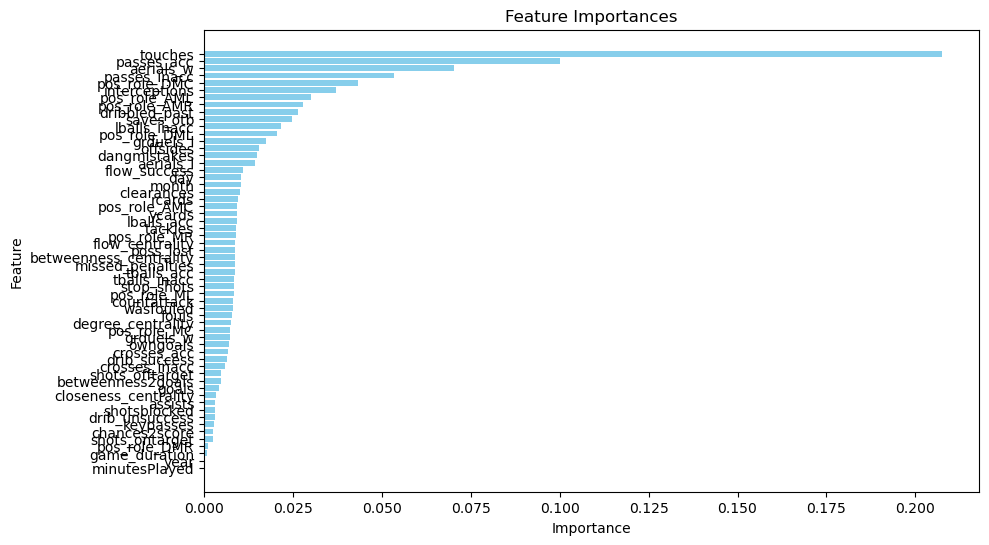

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Fit an ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [11]:
import pandas as pd

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
data.corr()

,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,saves_otb,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration,year,month,day,pos_role_AMC,pos_role_AML,pos_role_AMR,pos_role_DMC,pos_role_DML,pos_role_DMR,pos_role_MC,pos_role_ML,pos_role_MR,original_rating
goals,1.000000,-0.101468,-0.101078,-0.171686,-0.084803,-0.084803,-0.307645,-0.117641,-0.116591,0.110594,0.049101,0.139582,0.106021,0.068088,0.155221,0.085049,0.093955,0.084998,-0.144758,-0.149681,-0.036493,-0.001331,0.012652,-0.165828,-0.120267,0.089774,0.004378,-0.059976,0.084681,0.034430,-0.053695,0.064685,-0.156751,-0.078997,-0.211007,-0.148523,-0.104820,0.057994,0.072003,-0.073184,-0.010079,-0.020376,0.111251,0.131335,-0.004836,0.029110,-0.011849,-0.079071,-0.109340,-0.044002,-0.145324,-0.000207,0.097598,-0.082834,-0.004759,-0.010844,0.021308,-0.006644,0.017356
assists,-0.101468,1.000000,-0.060876,-0.103400,-0.051074,-0.051074,-0.185283,-0.070851,-0.070218,0.063579,0.058322,0.100550,0.111164,0.075762,0.113457,0.118633,0.137937,0.024835,-0.087136,-0.120999,-0.056110,0.049308,0.100426,-0.107566,-0.082823,0.148581,0.013633,-0.017177,0.036170,0.047799,-0.042524,0.043231,-0.092801,-0.068376,-0.093439,-0.082959,-0.058253,0.005787,-0.031309,-0.028274,0.014849,-0.014628,0.052046,0.094126,-0.002912,0.019787,0.013516,-0.084421,-0.097349,-0.062723,-0.104616,-0.001406,0.067791,-0.038404,-0.008589,-0.009057,-0.017088,0.000849,0.032922
shots_ontarget,-0.101078,-0.060876,1.000000,-0.103003,-0.050878,-0.050878,-0.184571,-0.070579,-0.069949,0.028267,0.028440,0.052494,0.032584,0.020254,0.064510,0.035018,0.074973,0.071221,-0.085996,-0.103189,-0.045645,0.090019,0.133901,-0.082948,-0.077729,0.050525,-0.012053,-0.038797,0.017582,0.043100,-0.052288,0.007223,-0.066265,-0.063635,-0.077372,-0.077760,-0.034839,0.003523,-0.006651,-0.034330,-0.011247,-0.024655,0.047305,0.093525,-0.002901,-0.002225,-0.007109,-0.078515,-0.086335,-0.051649,-0.105890,-0.000724,0.025853,-0.047389,-0.008431,-0.009829,-0.016942,0.000897,0.003852
shots_offtarget,-0.171686,-0.103400,-0.103003,1.000000,-0.086418,-0.086418,-0.313503,-0.119882,-0.118811,-0.071651,-0.067780,-0.090346,-0.065752,-0.033903,-0.116399,-0.079855,-0.127067,-0.092745,0.178557,0.249084,0.061005,-0.131092,-0.206269,0.189531,0.099520,-0.051823,-0.012959,0.086043,-0.000929,-0.092357,0.075918,0.000674,0.096215,0.071387,0.149757,0.176064,0.074632,-0.024656,0.006072,0.072138,0.023661,0.054782,-0.062855,-0.106068,-0.004928,-0.008150,0.014955,0.184218,0.114456,0.117200,0.185545,-0.000234,-0.065132,0.031278,-0.002315,0.000159,-0.024709,-0.001950,0.006765
shotsblocked,-0.084803,-0.051074,-0.050878,-0.086418,1.000000,-0.042686,-0.154853,-0.059215,-0.058686,-0.029674,0.006040,-0.032485,-0.049375,-0.033278,-0.040155,0.001067,0.009788,0.012780,0.042908,-0.052009,0.025764,0.122730,0.178002,-0.024852,0.030428,-0.017963,-0.040256,0.014538,-0.020579,0.099177,-0.032123,-0.044520,0.102333,0.014960,0.018291,-0.006315,-0.014072,-0.054056,-0.055039,-0.013777,-0.009436,-0.003755,-0.057746,-0.000441,-0.002434,-0.011170,-0.005964,-0.071711,-0.005396,-0.063730,0.028011,0.000166,-0.022217,0.035592,-0.008076,-0.018686,0.033580,0.007602,0.001241
chances2score,-0.084803,-0.051074,-0.050878,-0.086418,-0.042686,1.000000,-0.154853,-0.059215,-0.058686,-0.029674,-0.002927,-0.043406,-0.062412,-0.046102,-0.057525,-0.024216,-0.003802,0.003753,0.020027,-0.065853,0.030141,0.097615,0.135121,-0.001429,0.052818,-0.043033,-0.020677,0.045577,0.008666,0.069833,-0.022807,-0.039398,0.083602,-0.000162,0.031544,0.001809,0.002047,-0.030964,-0.054311,-0.003948,-0.0

<Axes: >

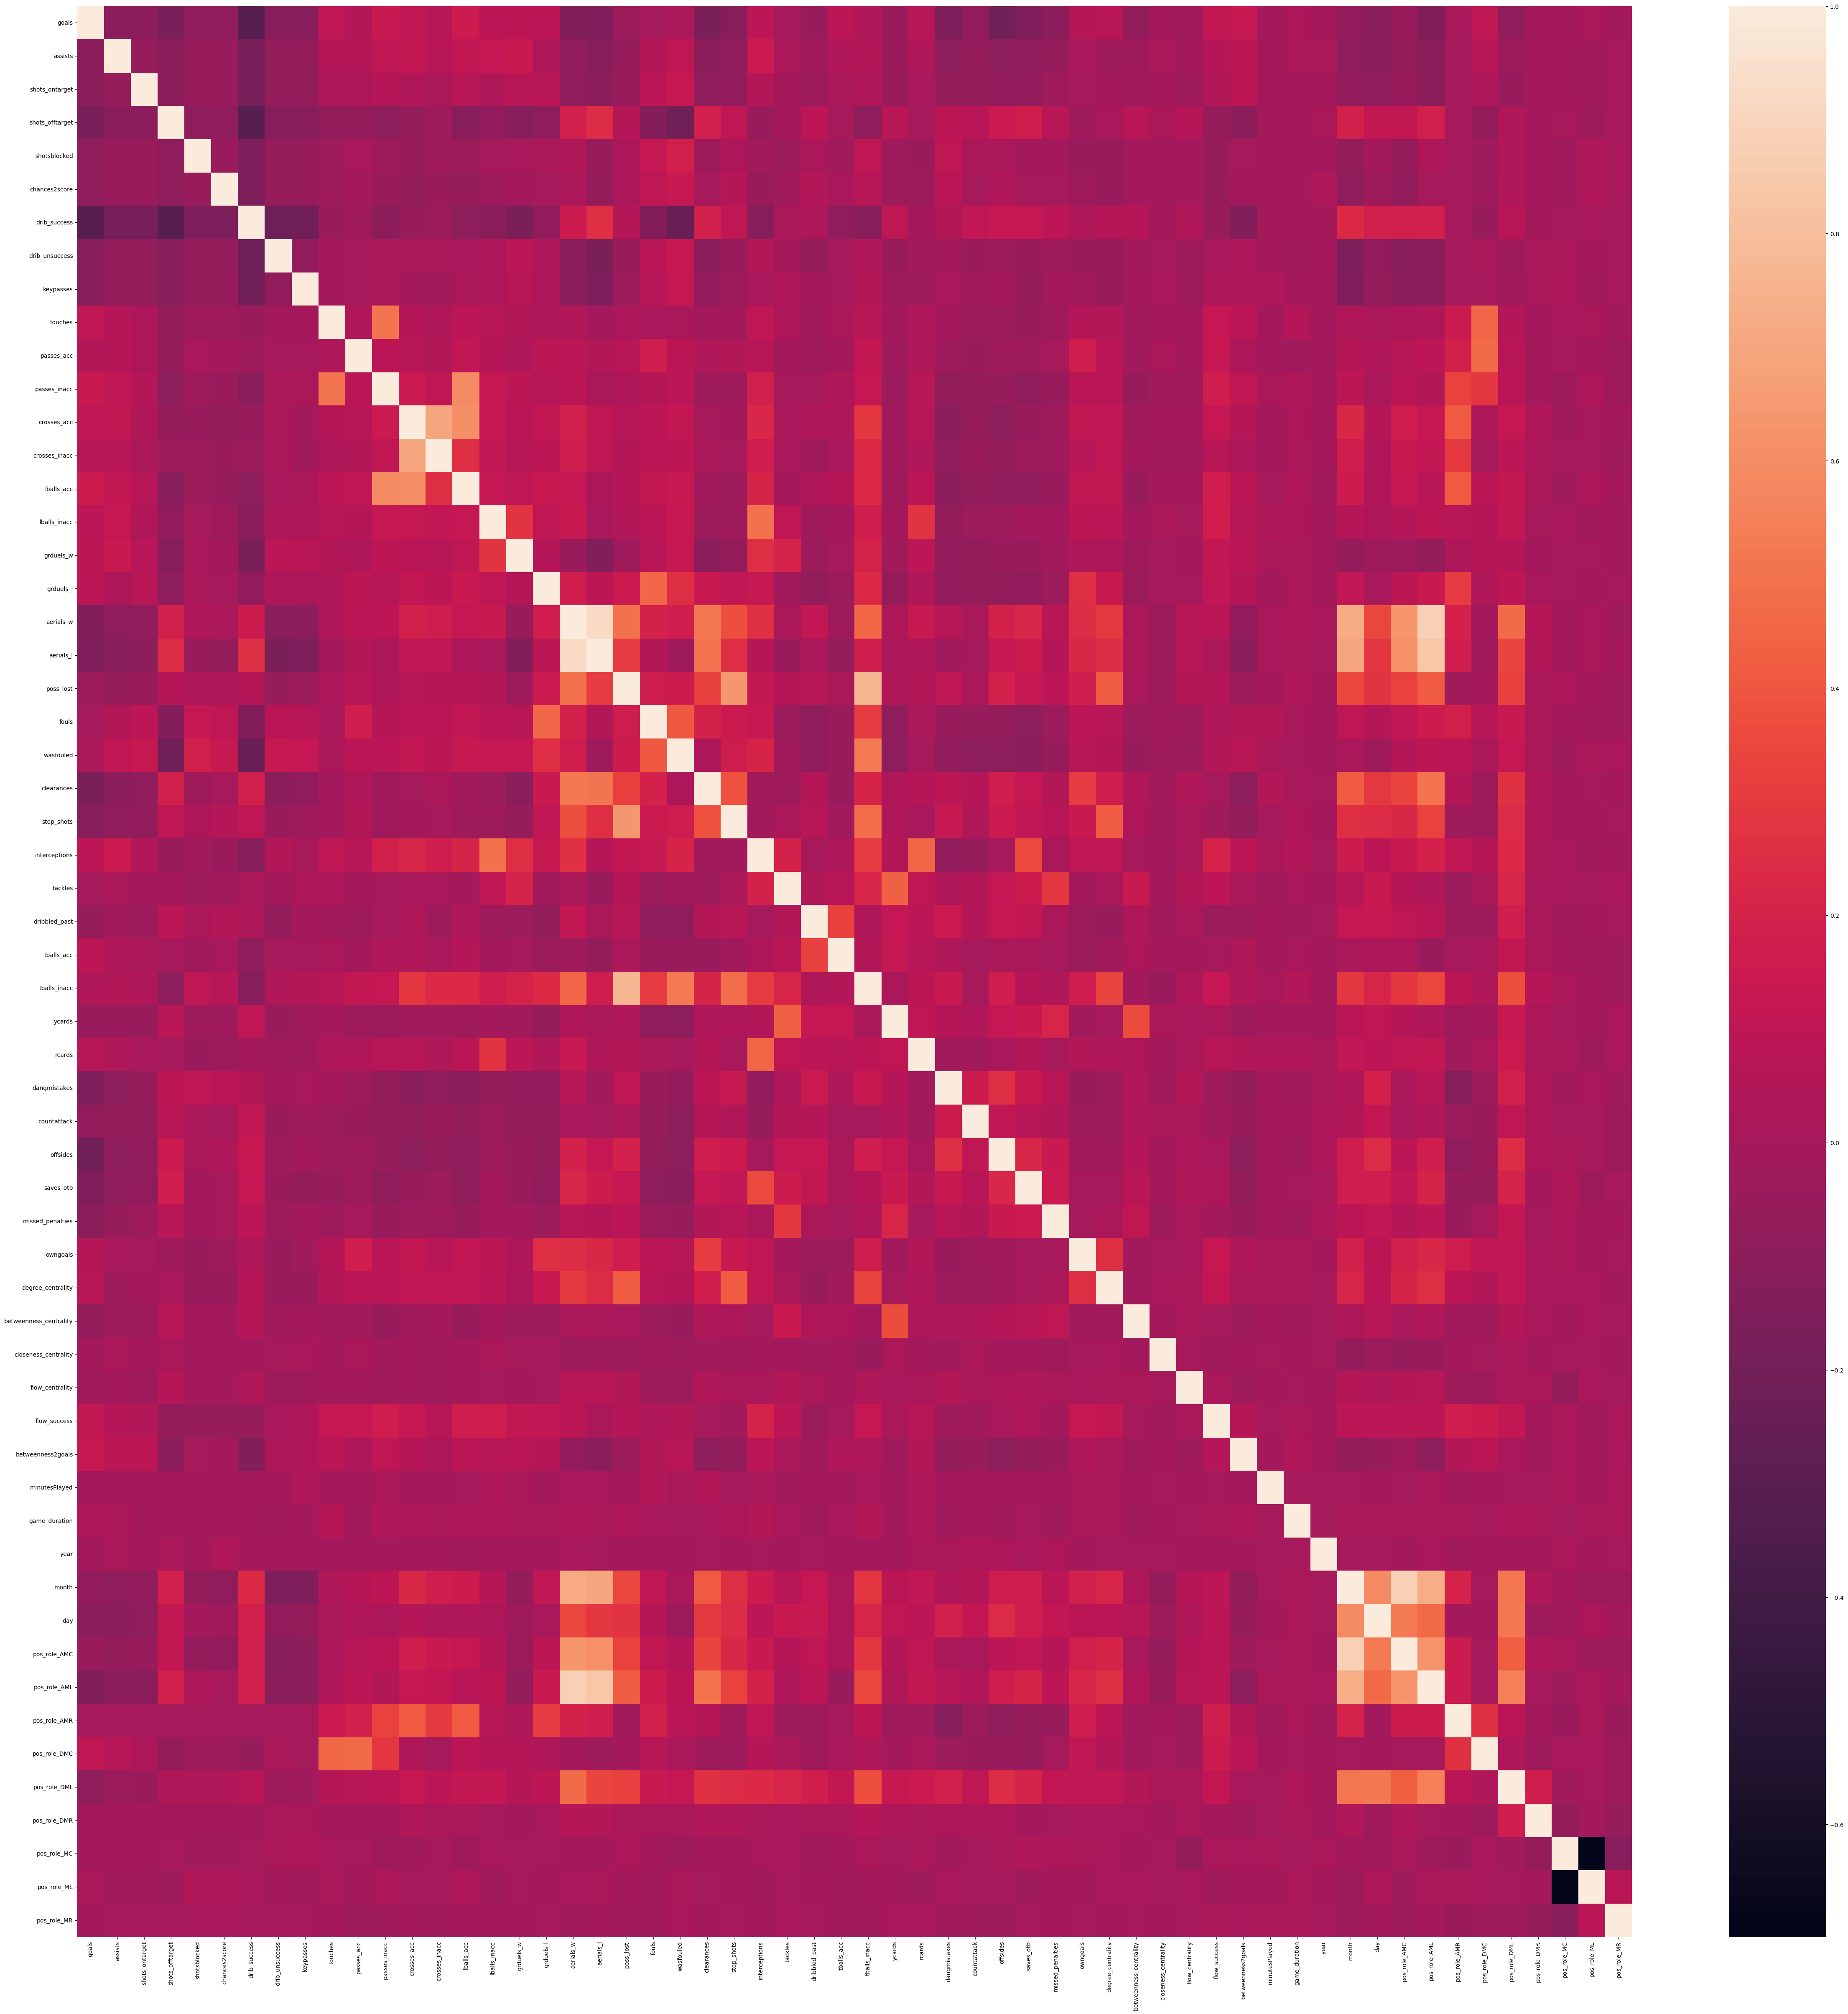

In [12]:
corr = data.drop(columns=['original_rating'], axis=1).corr()
top_features = corr.index
plt.figure(figsize=(60,60))
sns.heatmap(data[top_features].corr(), annot=False)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
threshold = 0.8
correlation(data.drop(columns=['original_rating'], axis=1), threshold)

{'aerials_l', 'pos_role_AMC', 'pos_role_AML'}

In [15]:
#check the columns to know which other they are correlated with
def correlated_columns(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
                correlated_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

    return col_corr, correlated_pairs

In [16]:
threshold = 0.8
col_corr, correlated_pairs = correlated_columns(data.drop(columns=['original_rating'], axis=1), threshold)

print("Highly correlated columns:")
print(col_corr)

print("\nPairs of highly correlated columns with their correlation coefficients:")
for pair in correlated_pairs:
    print(pair)

Highly correlated columns:
{'aerials_w', 'pos_role_AML', 'aerials_l', 'month', 'pos_role_AMC'}

Pairs of highly correlated columns with their correlation coefficients:
('aerials_l', 'aerials_w', 0.9217877548600687)
('pos_role_AMC', 'month', 0.8776086671580382)
('pos_role_AML', 'aerials_w', 0.8748016620633909)
('pos_role_AML', 'aerials_l', 0.8353618168590643)


In [21]:
from sklearn.decomposition import PCA
# Apply PCA to the features only
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(X)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components)

print("PCA DataFrame:")
print(pca_df.head())

PCA DataFrame:
         0         1         2         3         4         5         6   \
0 -0.305633 -0.193752  0.975814 -0.348805  0.165316  0.126815 -0.238711   
1  0.708786  0.348361  0.147645 -0.282657  0.083988 -0.030413 -0.229860   
2  0.793350  0.261120  0.281406 -0.317191  0.162631 -0.101517 -0.230768   
3 -0.599940  0.663487 -0.266761  0.093397  0.470776  0.274389 -0.231980   
4 -0.309219  0.364631  0.133696 -0.138879 -0.167369 -0.250436 -0.238788   

         7         8         9         10        11        12        13  \
0 -0.017061 -0.063202 -0.031150  0.001608 -0.386093 -0.368383  0.232751   
1  0.006798  0.012311 -0.015209 -0.035215  0.003959 -0.019263 -0.181870   
2  0.000151 -0.074632  0.025033  0.078838 -0.125921 -0.141082 -0.134895   
3 -0.001765 -0.017355 -0.010850 -0.052213 -0.029648 -0.017882 -0.074423   
4 -0.019961  0.637122 -0.579491  0.183662 -0.148620 -0.110429 -0.240187   

         14        15        16        17        18        19        20  \
0 -0.284

In [22]:
# Examine the PCA components (loadings)
components = pca.components_
features = X.columns

In [24]:
data.head()

,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,saves_otb,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration,year,month,day,pos_role_AMC,pos_role_AML,pos_role_AMR,pos_role_DMC,pos_role_DML,pos_role_DMR,pos_role_MC,pos_role_ML,pos_role_MR,original_rating
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.142857,0.00,0.166667,0.2,0.000000,0.0,0.309783,0.189024,0.391304,0.0,0.000000,0.222222,0.384615,0.20,0.333333,0.076923,0.071429,0.378378,0.571429,0.111111,0.250,0.00,0.538462,0.272727,0.666667,0.0,0.0,0.0,0.0,0.000000,0.133333,0.0,0.0,0.0,0.0,0.807692,0.634610,0.608589,0.419034,0.129835,0.000000,0.727273,0.0,0.0,0.454545,0.3,6.58
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.2,0.000000,0.00,0.000000,0.2,0.142857,0.0,0.385870,0.329268,0.260870,0.0,0.083333,0.055556,0.076923,0.24,0.000000,0.153846,0.000000,0.243243,0.000000,0.333333,0.000,0.00,0.230769,0.181818,0.166667,0.0,0.0,0.0,0.0,0.000000,0.066667,0.0,0.0,0.0,0.0,0.846154,0.585954,0.686398,0.635770,0.253000,0.000000,0.727273,0.0,0.0,0.454545,0.3,7.06
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.333333,0.0,0.000000,0.00,0.000000,0.2,0.142857,0.0,0.559783,0.463415,0.260870,0.0,0.000000,0.222222,0.076923,0.28,0.222222,0.076923,0.142857,0.270270,0.142857,0.000000,0.125,0.25,0.692308,0.545455,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.846154,0.559875,0.686398,0.721717,0.271071,0.096774,0.727273,0.0,0.0,0.454545,0.3,7.67
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.142857,0.25,0.000000,0.1,0.142857,0.5,0.163043,0.097561,0.173913,0.0,0.083333,0.055556,0.076923,0.16,0.444444,0.153846,0.071429,0.324324,0.000000,0.111111,0.000,0.00,0.076923,0.090909,0.166667,0.2,0.0,0.0,0.0,0.333333,0.400000,0.0,0.0,0.0,0.0,0.500000,0.231664,0.477541,0.328104,0.280399,0.000000,0.563636,0.0,0.0,0.454545,0.3,7.26
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.2,0.142857,0.00,0.333333,0.0,0.000000,0.0,0.163043,0.109756,0.260870,0.0,0.000000,0.222222,0.230769,0.00,0.166667,0.076923,0.785714,0.297297,0.142857,0.000000,0.125,0.00,0.153846,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.730769,0.733736,0.608589,0.309918,0.156223,0.000000,0.727273,0.0,0.0,0.454545,0.3,6.74


In [23]:
# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(components, columns=features)
print("PCA Loadings DataFrame:")
print(loadings_df.head())

PCA Loadings DataFrame:
      goals   assists  shots_ontarget  shots_offtarget  shotsblocked  \
0 -0.280601 -0.072383       -0.069866        -0.190541     -0.040615   
1  0.259059  0.018982        0.016439        -0.399584      0.016252   
2 -0.325893 -0.041263       -0.037438         0.605364      0.008024   
3  0.167304  0.006952       -0.004082        -0.231992     -0.007052   
4  0.687325 -0.107726       -0.120095         0.115806     -0.060076   

   chances2score  drib_success  drib_unsuccess  keypasses   touches  \
0      -0.040110      0.888193       -0.099177  -0.094899 -0.012378   
1       0.015031      0.066165        0.008747  -0.001089  0.016498   
2       0.009768     -0.109564       -0.057034  -0.051966 -0.022367   
3       0.004881     -0.024786        0.042375   0.046399  0.002019   
4      -0.067371      0.062669       -0.266636  -0.243896  0.039758   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0   -0.005944     -0.028361    -0.016711     

In [43]:
# Save X and y to CSV files
#change to goalkeeprs features later
#X.to_csv('defenders_featusres.csv', index=False)
#y.to_csv('defenders_target.csv', index=False)

#print("Files saved: 'defenders_features.csv' and 'defenders_target.csv'")

Files saved: 'defenders_features.csv' and 'defenders_target.csv'
